Author: Jackson Wang
# Exploratory Data Analysis on Customer Treadmill Purchases

## Introduction

The dataset from [Kaggle](https://www.kaggle.com/datasets/vsridevi/cardio-good-fitness) contains information on various customer treadmill purchases. The project task is to determine a specific target audience to advertise products to and opportunities for the store to increase business growth.

The data contains the following fields:
- Product: the model no. of the treadmill
- Age: in no. of years, of the customer
- Gender: of the customer
- Education: in no. of years, of the customer
- Marital Status: of the customer
- Usage: average # of times the customer wants to use the treadmill every week
- Fitness: self rated fitness score of the customer (1-very unfit, 5-very fit)
- Income: of the customer
- Miles: expected to run

**Business Questions**
- Which gender of customers have made more treadmill purchases for each treadmill?
- Are the customers who have higher fitness more willing to purchase treadmills?
- What is the usage amount of treadmills for both males and females?
- Are customers more willing to purchase treadmills if they're single or partnered?
- What age group has the highest amount of treadmill sales?

---

In [58]:
# Import relevant libraries for data manipulation and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
# Read in dataset in CSV format
df = pd.read_csv('CardioGoodFitness.csv')

In [60]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


As shown, there are 180 rows and 9 columns. The data types are accurate and correspond with the attributes and values.

In [61]:
# Preview the first 5 rows of the dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [62]:
# Preview the last 5 rows of the dataset
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


---

## Data Cleaning

Before starting the analysis and exploration of the dataset, it is essential to remove unnecessary data that may affect the results and lead our analysis to a completely different conclusion. For this dataset, we will determine if there is any existing missing or duplicate data.

**Missing Values**

Determine if there is any null values present in the dataset.

In [63]:
# No. of null values for each columns
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The results display that the dataset contains no null values.

**Duplicate Values**

Determine if there is any duplicate values that need to be removed from the dataset.

In [64]:
df[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [65]:
# No. of duplicate values
df.duplicated().sum()

0

The results show that the dataset has no duplicate values present in the dataset.

---

## Descriptive Statistics

We generate descriptive statistics with pandas.DataFrame.describe() method that summarises the overall dataset and allows for an overview in the output. Additionally, we parse 'include="all"' in the parameter to include the categorical attributes in the output.

In [66]:
# Descriptive statistics summary
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


'NaN' values are outputted for the categorical attributes since numerical calculations cannot be performed on these categorical values, therefore they are ignored. 

From the output above, it displays for the categorical features:
- There are 3 treadmills being sold to customers. Almost half of the products being purchased are TM195's
- A majority of the treadmills are bought by male customers with at least 59% of them being in a partnered status

Whereas for the numerical features, it is shown that:
- The average income of the customer base is $53,719.58
- 75% of purchases are made by customers of age 33 years old

---

## Exploratory Data Analysis

**1. Which gender of customers have made more treadmill purchases for each treadmill?**

In [67]:
# Pivot the table to display products as rows and genders as columns
treadmills_analysis = df.pivot_table(index='Product',columns='Gender', aggfunc='size')
treadmills_analysis

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


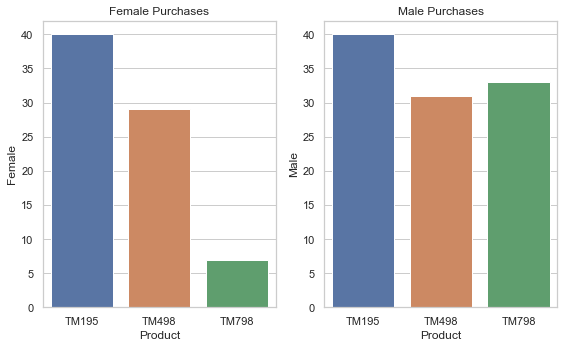

In [68]:
# Set the theme and figure to display 2 graphs on a 1x2 grid of axes
sns.set_theme(style='whitegrid')
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

# Plot barplots for both females and males
fig1 = sns.barplot(x=treadmills_analysis.index, y='Female', data=treadmills_analysis, ax=axes[0])
fig2 = sns.barplot(x=treadmills_analysis.index, y='Male', data=treadmills_analysis, ax=axes[1])

# Set the titles for each graph to eaily distinguish each
fig1.set_title('Female Purchases')
fig2.set_title('Male Purchases')

# Set the spacing between the subplots
figure.tight_layout()

Key observations:
- The TM195 treadmill have similar amount of purchases made by both genders
- Males tend to purchase the TM798 treadmill a lot more than females
- Females customers don't purchase treadmills as much as male customers do

**2. Are the customers who have higher fitness more willing to purchase treadmills?**

In [69]:
# Group by fitness levels
fitness_analysis = pd.DataFrame(df.groupby(['Fitness'])['Product'].count())

# Sort by descending order by the product purchases
fitness_sort = pd.DataFrame(fitness_analysis.sort_values('Product', ascending=False))
fitness_sort

,Product
Fitness,
3,97
5,31
2,26
4,24
1,2


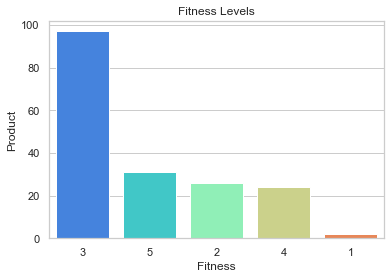

In [70]:
#Plot the bar plot ordering from highest to lowest purchases
sns.barplot(x=fitness_analysis.index, y='Product', data=fitness_analysis,
            palette='rainbow', order=fitness_sort.index)
plt.title('Fitness Levels')
plt.show()

From the analysis of the bar plot:
- Overall, customers with higher fitness levels purchase treadmills more rather than being unfit 
- The median level of fitness appears to have the highest amount of treadmills purchased
- Very unfit customers seem unwilling to purchase treadmills

**3. What is the usage amount of treadmills for both males and females?**

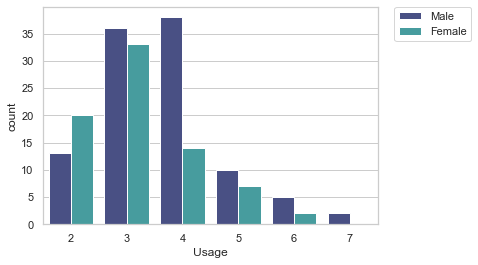

In [71]:
#Plot graph of usage counts based on each gender
sns.countplot(x='Usage', data=df, hue='Gender', palette='mako')

# Relocate the legend to not overlap the graph
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

The male customers see the most usage in treadmill purchases compared to females. However, customers don't seem to use the treadmills as often as the lower usage amounts. Therefore, a focus on promoting benefits of treadmills can increase customer base.

**4. Are customers more willing to purchase treadmills if they're single or partnered?**

In [72]:
# Group by marital status
marital_analysis = pd.DataFrame(df.groupby(['MaritalStatus'])['Product'].count())
marital_analysis

,Product
MaritalStatus,
Partnered,107
Single,73


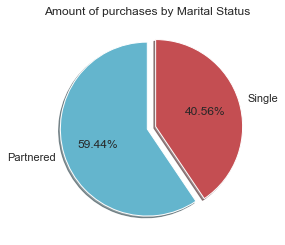

In [73]:
#Plot the pie chart
plt.pie('Product', labels=marital_analysis.index, data=marital_analysis, autopct='%.2f%%', 
        startangle=90, shadow=True, explode=[0,0.1], colors='crest')
plt.title('Amount of purchases by Marital Status')

plt.show()

**5. What age group has the highest amount of treadmill sales?**

Text(0.5, 1.0, 'Treadmill Sales by Age Group')

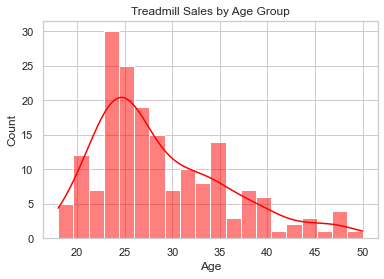

In [74]:
# Plot histogram with 20 bins for age groups
hist = sns.histplot(x='Age', data=df, bins=20, kde=True, alpha=0.5, color='red')

# Set the title for the histogram
hist.set_title('Treadmill Sales by Age Group')

There is a congregated amount of treadmill purchases ranging between the age group of 23-26 years. The older the customers are, the treadmill purchases decrease.

---

## Strategic Recommendation

**Recommendations**
- Focus on the TM195 treadmill as it is the highest selling treadmill. Additionally, promoting the TM798 treadmill to the male audience can increase further sales of the treadmill
- Target customers that are average in fitness as they are more willing to purchase treadmills. Very unfit customers tend to not purchase treadmills so focusing on fitness levels of 3-5 is more profitable
- For female customers, the usage of the treadmill is lower for them compared to males, so creating a program that assists in the benefits of treadmill usages could increase the awareness of treadmills for females
- For customers of partnered status, consider exclusive deals of purchasing treadmills for specific events
- The age group of customers is 23-26 years that make up the majority of customer base. Target treadmill sales for this specific age group by introducing promotional deals and advertisements focused on the age trend